## Importanto bibliotecas 

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura de Dados

In [54]:
data = pd.read_csv('data/new_diamonds.csv', dtype=float)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5.0,6.0,2.0,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,4.0,6.0,3.0,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,2.0,6.0,5.0,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,4.0,2.0,4.0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2.0,1.0,2.0,63.3,58.0,335.0,4.34,4.35,2.75


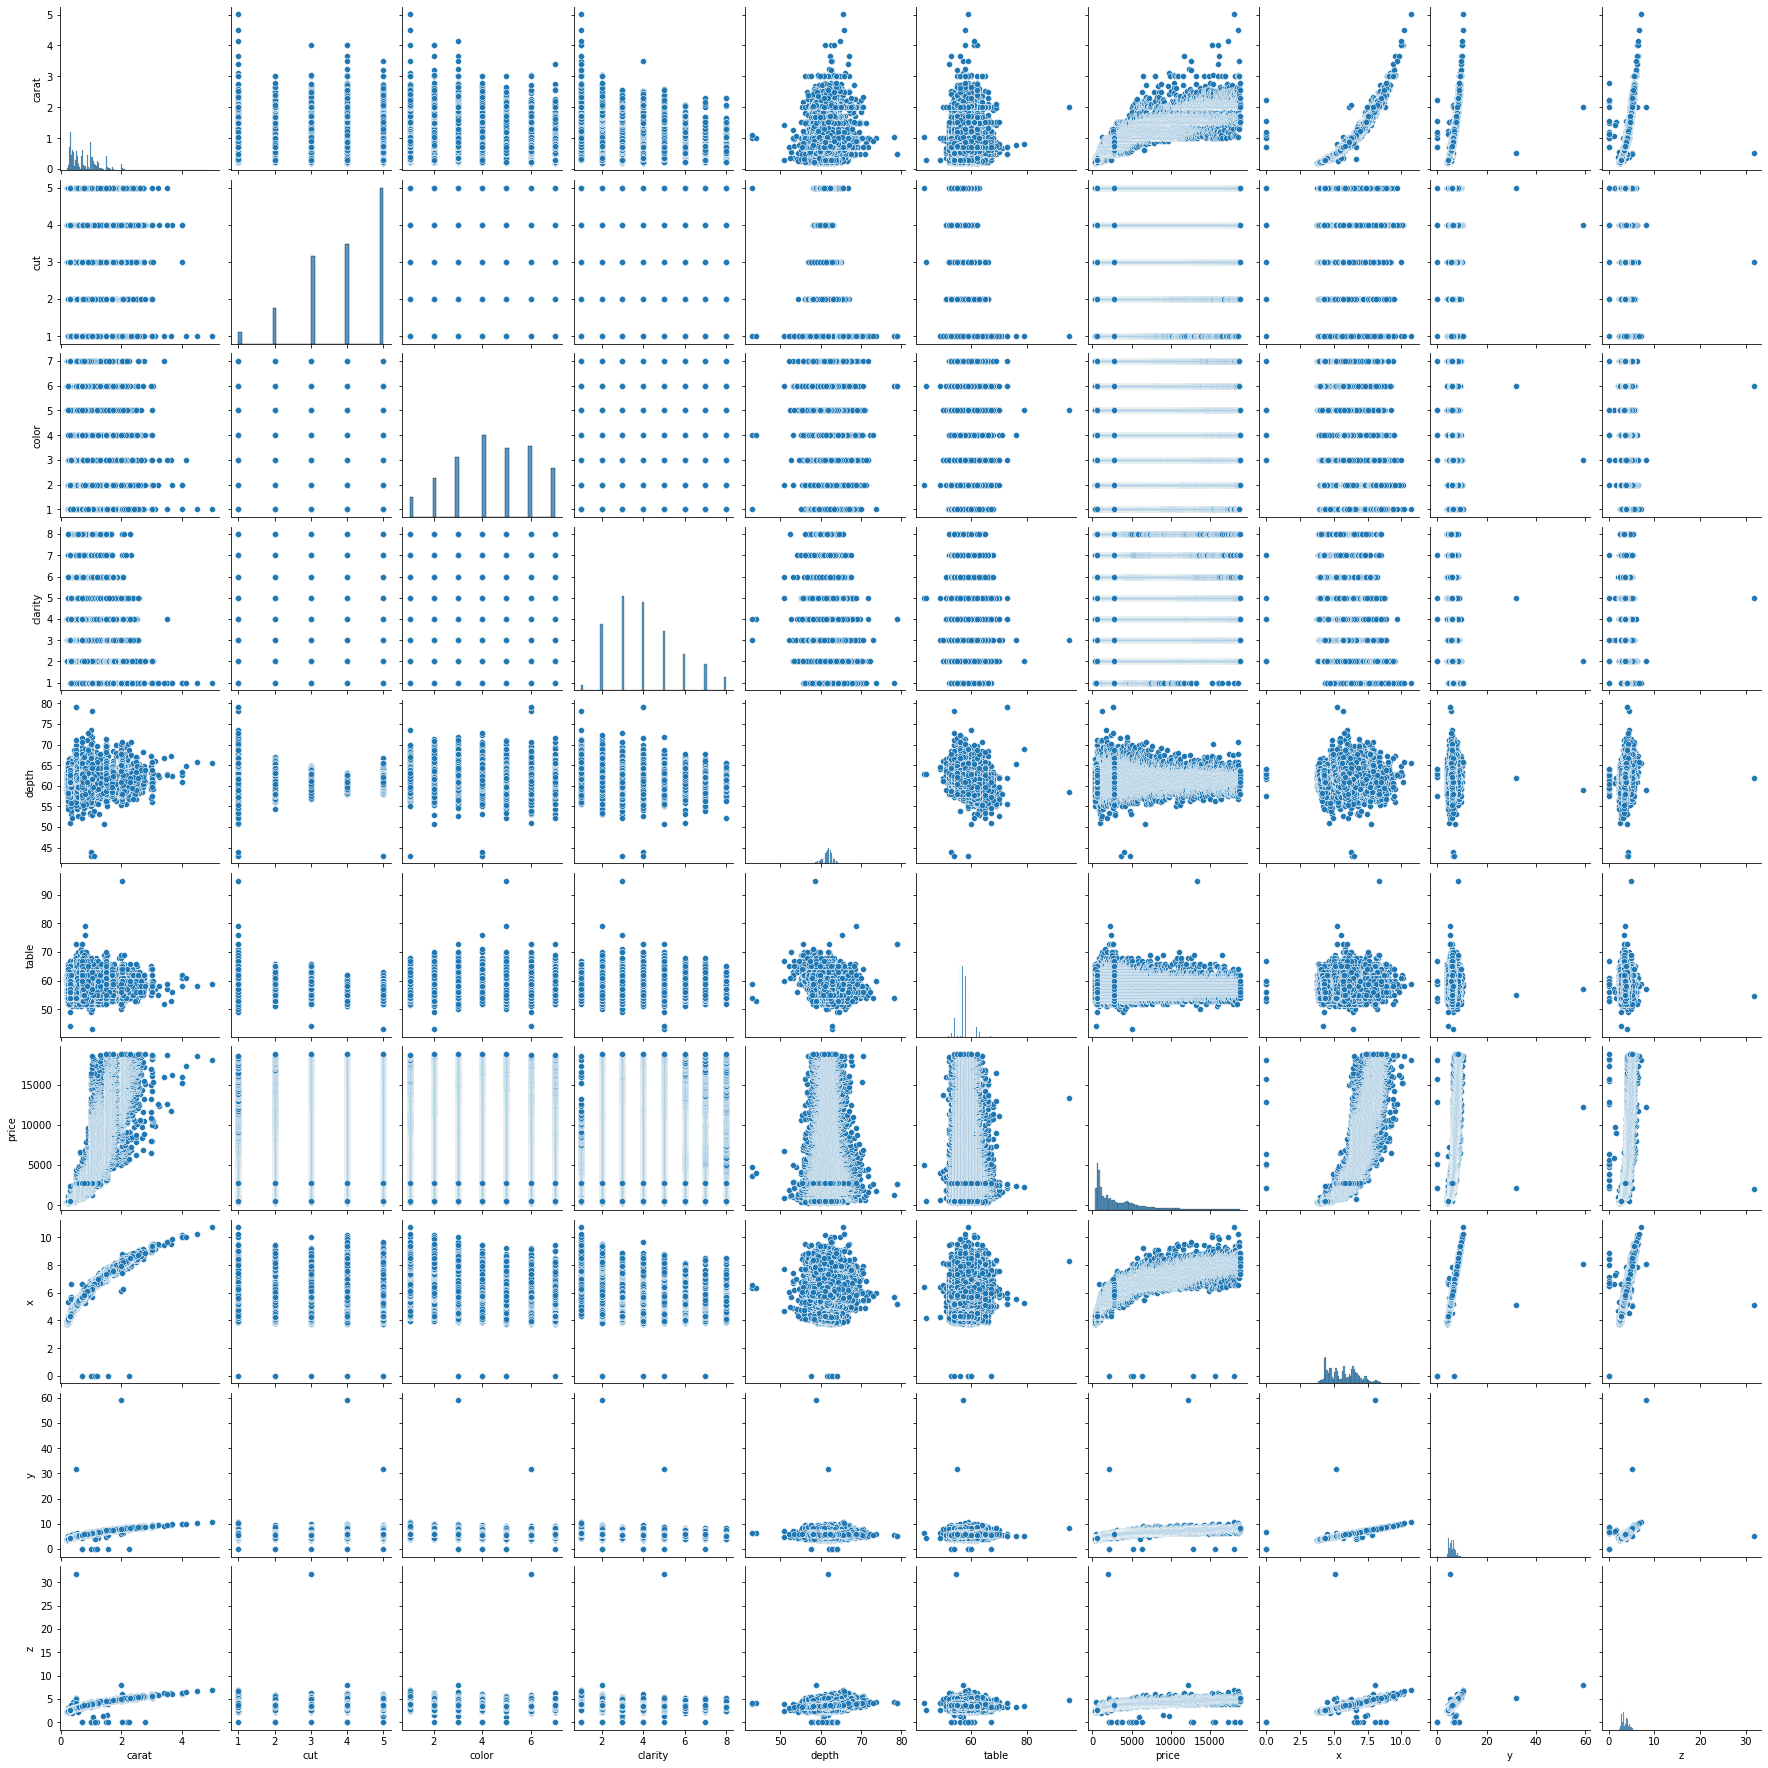

In [57]:
sns.pairplot(data)
plt.show()

## Split

In [58]:
y_data = data.pop('price')
x_data = data

x_data = x_data.to_numpy()
y_data = y_data.to_numpy()

mu = np.mean(y_data)
sigma = np.std(y_data)
# y_data = (y_data - mu) / sigma

In [59]:
mask = np.random.rand(x_data.shape[0]) < 0.8
x_train = x_data[mask]
y_train = y_data[mask]
x_test = x_data[~mask]
y_test = y_data[~mask]

In [60]:
x_train.shape

(43087, 9)

In [63]:
select = np.random.rand(x_data.shape[0]) < -1000

select[np.random.randint(len(select))] = True

x = x_data[select]
y = y_data[select]
x, y

(array([[ 0.27,  5.  ,  6.  ,  5.  , 61.6 , 55.  ,  4.16,  4.18,  2.57]]),
 array([470.]))

## Definindo o Modelo

In [7]:
model = keras.Sequential([
    layers.Dense(21, input_shape=(9, )),
    layers.Dense(8, activation='relu'),
    layers.Dense(5, 'sigmoid'),
    layers.Dense(3),
    layers.Dense(1),
])

In [8]:
model.output_shape

(None, 1)

In [16]:
mse = tf.keras.losses.MeanSquaredError()
mape = tf.keras.losses.MeanAbsolutePercentageError()
msle = tf.keras.losses.MeanSquaredLogarithmicError()
rmse = tf.keras.metrics.RootMeanSquaredError()
adam = keras.optimizers.Adam(0.01, clipnorm=1.)
rmsprop = tf.keras.optimizers.RMSprop(clipnorm=1.)
sgd = keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.)

In [17]:
model.compile(loss='mape', optimizer=rmsprop, metrics=[mse, msle, rmse])

## Treinando o modelo

In [64]:
train = model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
1347/1347 [==============================] - 7s 3ms/step - loss: 10.2297 - mean_squared_error: 602625.3125 - mean_squared_logarithmic_error: 0.0226 - root_mean_squared_error: 776.3686
Epoch 2/50
1347/1347 [==============================] - 4s 3ms/step - loss: 10.2629 - mean_squared_error: 601078.4375 - mean_squared_logarithmic_error: 0.0218 - root_mean_squared_error: 775.3326
Epoch 3/50
1347/1347 [==============================] - 4s 3ms/step - loss: 10.2570 - mean_squared_error: 600242.1875 - mean_squared_logarithmic_error: 0.0215 - root_mean_squared_error: 774.7343
Epoch 4/50
1347/1347 [==============================] - 4s 3ms/step - loss: 10.2563 - mean_squared_error: 602362.0000 - mean_squared_logarithmic_error: 0.0226 - root_mean_squared_error: 776.2562
Epoch 5/50
1347/1347 [==============================] - 4s 3ms/step - loss: 10.2998 - mean_squared_error: 595297.6875 - mean_squared_logarithmic_error: 0.0227 - root_mean_squared_error: 771.6724
Epoch 6/50
1347/1347 [===

1347/1347 [==============================] - 4s 3ms/step - loss: 9.9452 - mean_squared_error: 515749.0000 - mean_squared_logarithmic_error: 0.0180 - root_mean_squared_error: 718.2629
Epoch 43/50
1347/1347 [==============================] - 4s 3ms/step - loss: 9.9626 - mean_squared_error: 520102.2500 - mean_squared_logarithmic_error: 0.0182 - root_mean_squared_error: 721.2316
Epoch 44/50
1347/1347 [==============================] - 4s 3ms/step - loss: 9.9260 - mean_squared_error: 518157.5938 - mean_squared_logarithmic_error: 0.0191 - root_mean_squared_error: 719.8041
Epoch 45/50
1347/1347 [==============================] - 4s 3ms/step - loss: 9.9088 - mean_squared_error: 511415.4375 - mean_squared_logarithmic_error: 0.0179 - root_mean_squared_error: 715.2467
Epoch 46/50
1347/1347 [==============================] - 4s 3ms/step - loss: 9.9700 - mean_squared_error: 509999.1250 - mean_squared_logarithmic_error: 0.0192 - root_mean_squared_error: 714.0711
Epoch 47/50
1347/1347 [==============

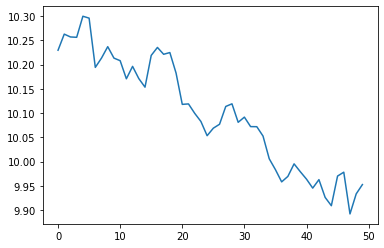

In [65]:
plt.plot(train.history['loss'])
plt.show()

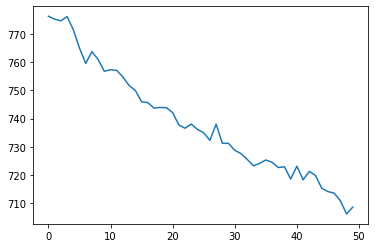

In [66]:
plt.plot(train.history['root_mean_squared_error'])
plt.show()

In [67]:
model.evaluate(x_test, y_test)

340/340 [==============================] - 1s 2ms/step - loss: 9.6462 - mean_squared_error: 472131.1562 - mean_squared_logarithmic_error: 0.0193 - root_mean_squared_error: 687.7821


[9.646247863769531, 472131.15625, 0.019260428845882416, 687.7821044921875]

In [68]:
model.evaluate(x, y)

1/1 [==============================] - 0s 140ms/step - loss: 15.1651 - mean_squared_error: 5080.2510 - mean_squared_logarithmic_error: 0.0199 - root_mean_squared_error: 71.2759


[15.165080070495605, 5080.2509765625, 0.019857551902532578, 71.27587890625]

In [69]:
model.predict(x).T, y

1/1 [==============================] - 0s 68ms/step


(array([[541.2759]], dtype=float32), array([470.]))

In [70]:
model.save('model_2022_10_14')

INFO:tensorflow:Assets written to: model_2022_10_14\assets
